In [155]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
from collections import Counter


warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np

In [204]:
#Dataset
train_sample_1 = pd.read_csv('KNN_Data/train_sample.csv')
test_sample_1 = pd.read_csv('KNN_Data/test_sample.csv')
train_sample_2 = pd.read_csv('KNN_Data/train_sample_2.csv')
test_sample_2 = pd.read_csv('KNN_Data/test_sample_2.csv')

In [157]:
print('Train sample 1: ', train_sample_1.shape,train_sample_1.describe())


Train sample 1:  (5000, 785)              label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
count  5000.000000  5000.0  5000.0  5000.0  5000.0  5000.0  5000.0  5000.0   
mean      4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       2.872569     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       2.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       7.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       9.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel7  pixel8  ...     pixel774     pixel775  pixel776     pixel777  \
count  5000.0  5000.0  ...  5000.000000  5000.000000    5000.0  5000.000000   
mean      0.0     0.0  ...     0.176800     0.039000       0.0     0.015800   
std       0.0     0.0  ...     

In [158]:
print('Test sample 1: ', test_sample_1.shape)
print(test_sample_1.describe())
    

Test sample 1:  (1000, 785)
             label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
count  1000.000000  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
mean      4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       2.873719     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       2.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       7.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       9.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel7  pixel8  ...     pixel774     pixel775    pixel776     pixel777  \
count  1000.0  1000.0  ...  1000.000000  1000.000000  1000.00000  1000.000000   
mean      0.0     0.0  ...     0.252000     0.340000     0.38200     0.177000   
std       0.0     0.0  ...

In [159]:
print('Train sample 2: ', train_sample_2.shape, train_sample_2.describe())

Train sample 2:  (5000, 782)              label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
count  5000.000000  5000.0  5000.0  5000.0  5000.0  5000.0  5000.0  5000.0   
mean      4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       2.872569     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       2.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       7.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       9.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel7  pixel8  ...     pixel771     pixel772     pixel773  \
count  5000.0  5000.0  ...  5000.000000  5000.000000  5000.000000   
mean      0.0     0.0  ...     0.487200     0.516600     0.303400   
std       0.0     0.0  ...     8.876395     9.785626     6.87

In [160]:
print('Test sample 2: ', test_sample_2.shape, test_sample_2.describe())

Test sample 2:  (1000, 785)              label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
count  1000.000000  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
mean      4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       2.873719     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       2.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       7.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       9.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel7  pixel8  ...     pixel774     pixel775    pixel776     pixel777  \
count  1000.0  1000.0  ...  1000.000000  1000.000000  1000.00000  1000.000000   
mean      0.0     0.0  ...     0.252000     0.340000     0.38200     0.177000   
std       0.0     0.0  ...

In [161]:
print(train_sample_1['label'].value_counts())

0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
9    500
Name: label, dtype: int64


In [193]:
print(test_sample_1['label'].value_counts())


0    100
1    100
2    100
3    100
4    100
5    100
6    100
7    100
8    100
9    100
Name: label, dtype: int64


In [163]:
X = train_sample_1.drop(columns='label')
y = train_sample_1['label']
X_val = test_sample_1.drop(columns='label')
y_val = test_sample_1['label']

[0 1 2 3 4 5 6 7 8 9]


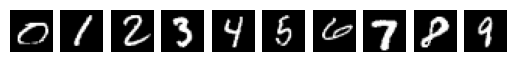

In [164]:
for e,i in enumerate(range(0,5000,500)):
    plt.subplot(1,10,e+1)
    plt.axis('off')
    plt.imshow(X.to_numpy()[i].reshape(28,28),cmap='gray')

targets = y.unique()
print(targets)
    

In [184]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [185]:
k = [1,2,3,4,5,6]
best_score = []

for i in k:
    knn_tuner = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred = knn_tuner.predict(X_test)
    classification = classification_report(y_test,y_pred,output_dict=True)
    accuracy = accuracy_score(y_test,y_pred)
    macro_precision = classification['macro avg']['precision']
    macro_recall = classification['macro avg']['recall']
    macro_f1_score = classification['macro avg']['f1-score']
    best_score.append(f"{i} :Accuracy: {accuracy}\n Macro-Average Precision: {macro_precision}\n Macro-Average Recall: {macro_recall}\n Macro-Average F1-Score: {macro_f1_score}")

for score in best_score:
    print(f"{score}\n")
 

1 :Accuracy: 0.936
 Macro-Average Precision: 0.9359941355138062
 Macro-Average Recall: 0.934308656102034
 Macro-Average F1-Score: 0.9346675166231762

2 :Accuracy: 0.9264
 Macro-Average Precision: 0.9285599944315793
 Macro-Average Recall: 0.9236321222931487
 Macro-Average F1-Score: 0.9230770207277057

3 :Accuracy: 0.9464
 Macro-Average Precision: 0.9464278007191149
 Macro-Average Recall: 0.9447442444679728
 Macro-Average F1-Score: 0.9449577005650992

4 :Accuracy: 0.944
 Macro-Average Precision: 0.9450939077511616
 Macro-Average Recall: 0.9429209075576555
 Macro-Average F1-Score: 0.9430396330442521

5 :Accuracy: 0.9408
 Macro-Average Precision: 0.9418538907283036
 Macro-Average Recall: 0.9392870353405552
 Macro-Average F1-Score: 0.939607019658062

6 :Accuracy: 0.9368
 Macro-Average Precision: 0.9370918711937006
 Macro-Average Recall: 0.9349231397609294
 Macro-Average F1-Score: 0.9350262867035743



In [186]:
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [195]:
train_score = knn.score(X_train,y_train)
print(f"Train Accuracy score: {train_score}")

y_pred = knn.predict(X_val)
val_score = accuracy_score(y_val,y_pred)
print(f"Validation Accuracy score:{val_score}")
print(f"Diff mellan Test Score och Validation Score: {0.9464-val_score} med k = 3")


Train Accuracy score: 0.9642666666666667
Validation Accuracy score:0.937
Diff mellan Test Score och Validation Score: 0.009399999999999964 med k = 3


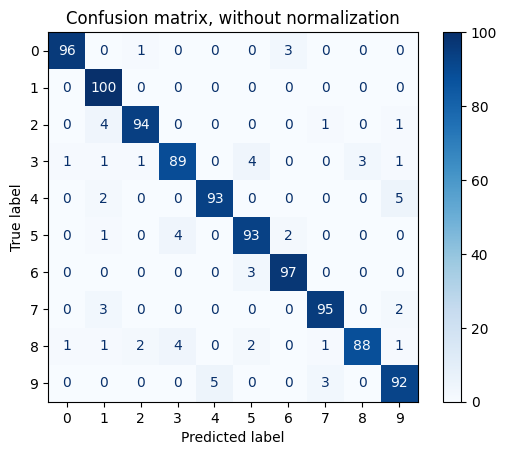

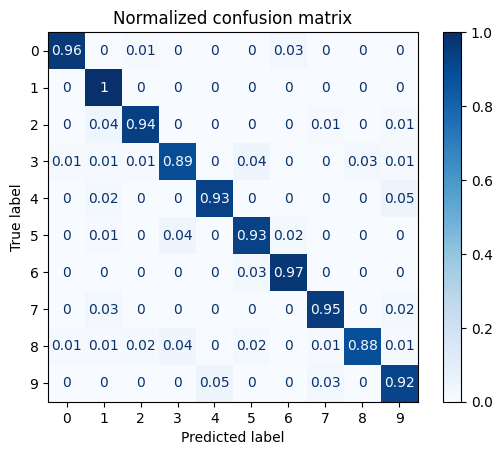

In [196]:

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        X_val,
        y_val,
        display_labels=targets,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)



plt.show()

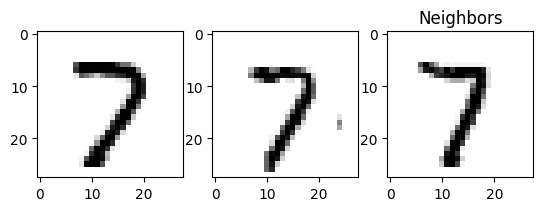

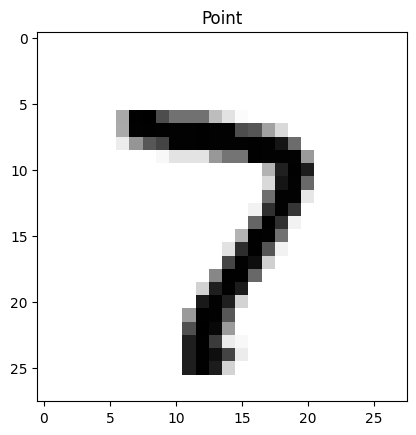

In [170]:
def draw_neighbors(target,x_trained,model):
    neighbors = model.kneighbors(target)
    neighbors = neighbors[1][0]
    for index,n in enumerate(neighbors):
        plt.subplot(1,len(neighbors),index+1)
        plt.imshow(x_trained.iloc[[n]].values.reshape(28,28),cmap='gray_r')
    plt.title('Neighbors')
    plt.show()

    plt.imshow(target.values.reshape(28,28),cmap='gray_r')
    plt.title('Point')
    plt.show()

# Välj rad i X_val för att skicka in
draw_neighbors(X_val.iloc[[700]], X_train,knn)




KNN class

In [202]:

def euclidiean_distance(x1,x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance


class KNN:
    def __init__(self,k=3):
        self.k = k
    
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):

        predictions = [self.__predict(x)for x in X] 
        return predictions
    
    def accuracy_score(self, predictions):
        acc = np.sum(predictions == y_val)/ len(y_val)
        return acc

    
    def __predict(self,x):
        
        #Calculates distance
        distances = [euclidiean_distance(x,X_train) for x_train in self.X_train] 

        # Get closest K
        k_indices = np.argsort(distances[:self.k])
        k_nearest_labels = [self.y_train[i]for i in k_indices] 

        # Voting
        most_common = Counter(k_nearest_labels).most_common() 
        return most_common[0][0]

In [206]:
knn_2 = KNN(k=3)
knn_2.fit(X_train,y_train)
predictions = knn.predict(X_val)
knn_2.accuracy_score(predictions)

0.937